# 서로소 집합(Disjoint Sets)
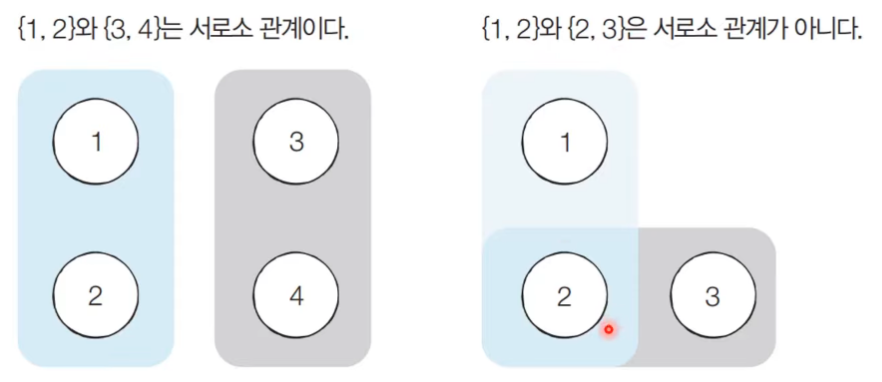
- 공통 원소가 없는 두 집합
- 서로소 집합 자료구조는 몇몇 그래프 알고리즘에서 매우 중요하게 사용된다.

# 서로소 집합(Union-Find) 자료구조
- 서로소 부분 집합들로 나누어진 원소들의 데이터를 처리하기 위한 자료구조
- <u>union</u>과 <u>find</u>이 2개의 연산으로 조작할 수 있다.
    - **union(합집합)**: 2개의 원소가 포함된 집합을 하나의 집합으로 합치는 연산
    - **find(찾기)**: 특정한 원소가 속한 집합이 어떤 집합인지 알려주는 연산
- 두 집합이 서로소 관계인지를 확인할 수 있다. -> 각 집합이 어떤 원소를 공통으로 가지고 있는지 확인할 수 있다.

서로소 집합 자료구조를 구현할 때, **트리** 자료구조를 이용하여 집합을 표현한다.
1. union(합집합) 연산을 확인하여, 서로 연결된 두 노드 A, B를 확인한다.  
    1-1) A와 B의 루트 노드 A', B'를 각각 찾는다.  
    1-2) A'를 B'의 부모 노드로 설정한다(B'가 A'를 가리키도록 한다.)
2. 모든 union(합집합) 연산을 처리할 때까지 1번 과정을 반복한다.

<u>실제로 구현할 때는 A'와 B' 중에서 더 번호가 작은 원소가 부모 노드가 되도록 구현하는 경우(최소힙)가 많다</u>

- 집합의 각 **원소**는 그래프에서의 **노드**로 표현되고, '같은 집합에 속한다'는 정보를 담은 **union 연산**들은 **간선**으로 표현된다.

1. 노드의 개수(V, 원소의 개수) 크기의 부모 테이블을 초기화 한다. (모든 원소가 자기 자신을 부모로 가지도록 설정한다.)
2. 합집합 연산을 수행한다. (부모 테이블을 갱신하는 과정에서, 루트를 찾기 위해서는 재귀적으로 부모를 거슬러 올라가야 한다)

In [10]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x): # 경로 압축(find함수를 재귀적으로 호출한 뒤에, 부모 테이블값을 갱신하는 기법)
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a) # 부모 노드를 찾는다
    b = find_parent(parent, b)
    if a < b: # 더 큰 부모 노드가 더 작은 부모 노드를 가리키도록 한다.
        parent[b] = a
    else:
        parent[a] = b
        
# 노드(원소)의 개수와 간선(union 연산)의 개수 입력받기
v, e = map(int, input().split())
parent = [0] * (v+1) # 부모 테이블 초기화

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i
    
# union 연산을 각각 수행
for i in range(e):
    a, b = map(int, input().split())
    union_parent(parent, a, b)
    
# 각 원소가 속한 집합 출력
print('각 원소가 속한 집합: ', end='')
for i in range(1, v+1):
    print(find_parent(parent, i), end=' ')
    
print()

# 부모 테이블 내용 출력
print('부모 테이블: ', end='')
for i in range(1, v+1):
    print(parent[i], end=' ')

6 4
1 4
2 3
2 4
5 6
각 원소가 속한 집합: 1 1 1 1 5 5 
부모 테이블: 1 1 1 1 5 5 

시간복잡도: $O(V + M(1+log_{2-M/V}V))$
- 노드의 개수: V개
- 최대 V-1개의 union 연산과 M개의 find 연산

# 서로소 집합을 활용한 사이클 판별
- 서로소 집합은 **무방향 그래프 내에서의 사이클을 판별**할 때 사용할 수 있다.
- 방향 그래프에서의 사이클 여부는 DFS를 이용해 판별한다.

union 연산은 그래프에서의 간선으로 표현될 수 있다.  
따라서, 간선을 하나씩 확인하면서 두 노드가 포함되어 있는 집합을 합치는 과정을 반복하는 것만으로도 사이클을 판별할 수 있다.

1. 각 간선을 확인하며 두 노드의 루트 노드를 확인한다.  
    1-1) 루트 노드가 서로 다르다면 두 노드에 대하여 union 연산을 수행한다.  
    1-2) 루트 노드가 서로 같다면 사이클(Cycle)이 발생한 것이다.
2. 그래프에 포함되어 있는 모든 간선에 대하여 1번 과정을 반복한다.

In [13]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]


# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b
        
# 노드(원소)의 개수와 간선(union 연산)의 개수 입력받기
v, e = map(int, input().split())
parent = [0] * (v+1) # 부모 테이블 초기화

# 부모 테이블 상에서, 부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i
    
cycle = False # 사이클 발생여부

for i in range(e):
    a, b = map(int, input().split())
    # 사이클이 발생한 경우 종료
    if find_parent(parent, a) == find_parent(parent, b):
        cycle = True
        break
    # 사이클이 발생하지 않았다면 합집합(union) 수행
    else:
        union_parent(parent, a, b)
        
if cycle:
    print("사이클이 발생했습니다.")
else:
    print("사이클이 발생하지 않았습니다.")

3 3
1 2
1 3
2 3
사이클이 발생했습니다.
